In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
urm_path = '/mnt/data/URM.csv'
icm_150_path = '/mnt/data/150_ICM.csv'
icm_500_path = '/mnt/data/500_ICM.csv'

In [6]:
# Load User Rating Matrix (URM)
ur_df = pd.read_csv('URM.csv')
print("URM Data Sample:")
print(ur_df.head())
print(ur_df.info())

URM Data Sample:
   ItemID  UserID
0       0       0
1       0       1
2       0       2
3       0       3
4       0       5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83550 entries, 0 to 83549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ItemID  83550 non-null  int64
 1   UserID  83550 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB
None


In [7]:
# Load Item Content Matrices
icm_150_df = pd.read_csv('150_ICM.csv')
icm_500_df = pd.read_csv('500_ICM.csv')

print("ICM 150 Data Sample:")
print(icm_150_df.head())
print(icm_150_df.info())

ICM 150 Data Sample:
   ItemID  FeatureID   Value
0       0          0  0.1983
1       0          1  1.0000
2       0          2  1.0000
3       0          3  1.0000
4       0          4  2.0046
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232822 entries, 0 to 232821
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ItemID     232822 non-null  int64  
 1   FeatureID  232822 non-null  int64  
 2   Value      232822 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.3 MB
None


In [8]:
print("ICM 500 Data Sample:")
print(icm_500_df.head())
print(icm_500_df.info())

ICM 500 Data Sample:
   ItemID  FeatureID   Value
0       0          0  0.1875
1       0          1  4.0641
2       0          3  1.0000
3       0          4  2.4914
4       0          6  0.5000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513347 entries, 0 to 513346
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ItemID     513347 non-null  int64  
 1   FeatureID  513347 non-null  int64  
 2   Value      513347 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 11.7 MB
None


Dataset Overview

We have three datasets:

1.	User Rating Matrix (URM)
2.
o	Size: (17,632 users × 1,890 items)

o	85,350 interactions between users and items.

o	Represents which users interacted with which items.

2.	Item Content Matrices (ICM)
3.
o	ICM 150: (18,022 items × 150 features) → 232,822 non-zero values.

o	ICM 500: (18,022 items × 500 features) → 513,347 non-zero values.


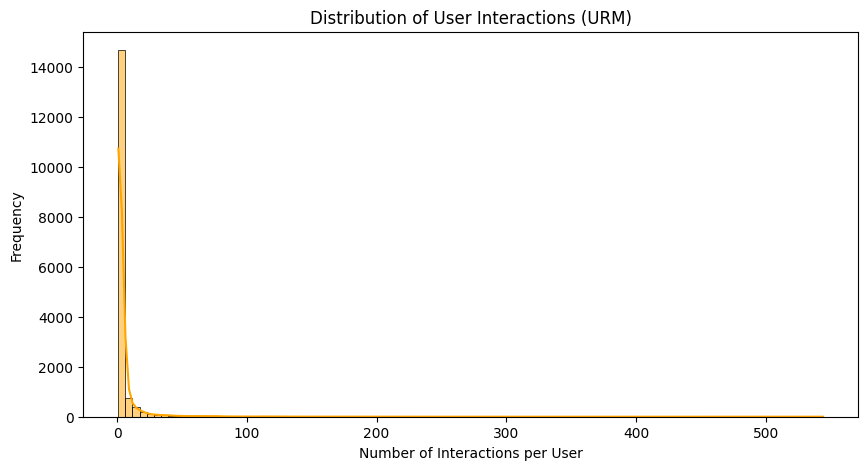

In [18]:
# Distribution of User Interactions
interaction_counts = ur_df.groupby("UserID")["ItemID"].count()

plt.figure(figsize=(10,5))
sns.histplot(interaction_counts, bins=100, kde=True, color='orange')

plt.xlabel("Number of Interactions per User")
plt.ylabel("Frequency")
plt.title("Distribution of User Interactions (URM)")
plt.show()

📌 Key Takeaways from the Plot

1.	Most users have very few interactions.

o	The highest bars are near 0 on the x-axis, meaning most users interact with only a few items.

o	This indicates an imbalance where a small number of users contribute most interactions.

2.	Some users interact a lot, but they are rare.

o	The x-axis extends to 500+, but the bars at higher values are almost non-existent.

o	This suggests a long-tail distribution, where only a small number of users are highly engaged.

3.	Why This Matters?

o	The cold-start problem is significant—many users have too few interactions, making recommendations difficult.

o	A personalized recommendation model is needed to improve engagement for low-interaction users.


🟡 X-Axis: "Number of Interactions per User"

•	Represents how many items a user has interacted with.

•	Example:

o	If a user has interacted with 5 items, that counts as 5 interactions.

o	If another user has interacted with 100 items, that counts as 100 interactions.

•	The values on the x-axis range from 0 to 500+, showing that some users have very few interactions, while a small number of users have a lot.

🟡 Y-Axis: "Frequency"
•	Represents how many users have a certain number of interactions.

•	Example:

o	If the bar at x = 5 reaches 2000 on the y-axis, it means 2,000 users interacted with exactly 5 items.

o	If the bar at x = 100 is much lower, it means very few users interacted with 100 items.


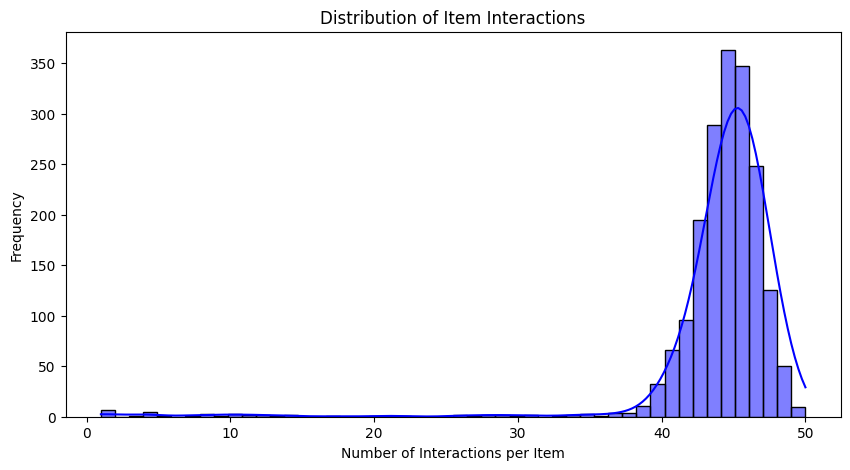

In [13]:
# Distribution of Item Interactions
item_interaction_counts = ur_df["ItemID"].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(item_interaction_counts, bins=50, kde=True, color='blue')
plt.xlabel("Number of Interactions per Item")
plt.ylabel("Frequency")
plt.title("Distribution of Item Interactions")
plt.show()

🔹 Key Observations

1️Most Items Have a Similar Number of Interactions

•	The peak is around 40-50 interactions per item.

•	This suggests that most items receive a moderate and balanced number of interactions.

2️ Few Items Have Extremely Low or High Interactions

•	The left side (x ≈ 0-10) has very few items, meaning very few items are ignored by users.

•	There are no extreme outliers (items with hundreds of interactions), meaning no item is excessively dominating the recommendation space


📌 Takeaways for Recommender Systems

•	The interaction distribution is well-formed, meaning most items have a reasonable amount of user engagement.

•	Since few items have very low interactions, the cold-start problem (items without interactions) is less severe in this dataset.

•	A content-based recommendation approach using ICM features can help improve recommendations for less popular items.

✅ X-Axis: "Number of Interactions per Item"

•	Represents how many users interacted with each item.

•	Each value on the x-axis shows an item’s interaction count.

o	Example: If an item has 10 interactions, it means 10 different users have interacted with it.

o	The x-axis ranges from 0 to around 50 interactions per item.

✅ Y-Axis: "Frequency"

•	Represents how many items have a certain number of interactions.

•	The height of each bar shows how many items received that number of interactions.

o	Example: A tall bar at x = 45 means many items received 45 interactions.


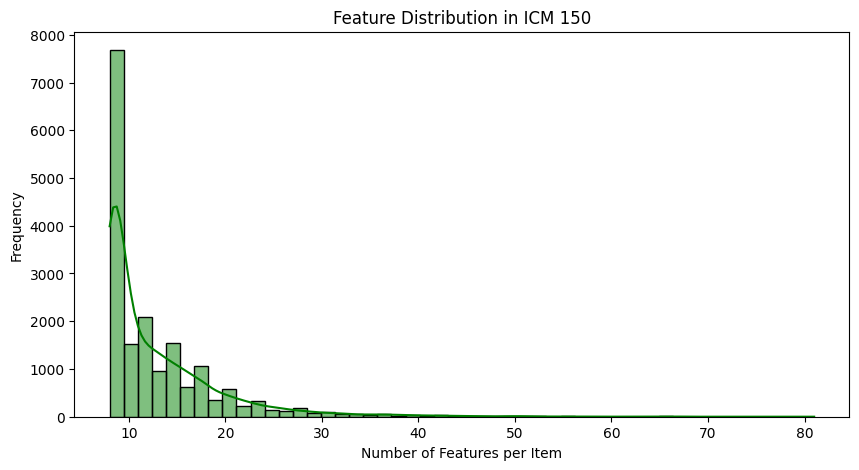

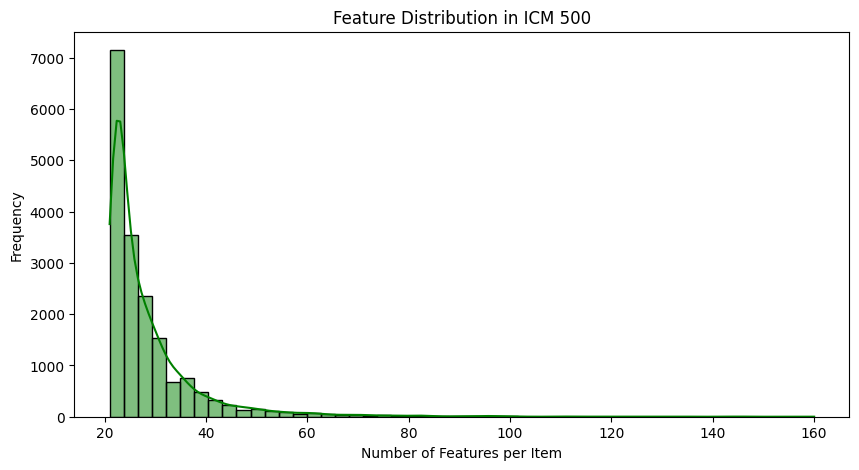

In [14]:
# Metadata sparsity analysis for ICM datasets
def plot_icm_sparsity(icm_df, title):
    item_feature_counts = icm_df.groupby("ItemID").size()
    plt.figure(figsize=(10,5))
    sns.histplot(item_feature_counts, bins=50, kde=True, color='green')
    plt.xlabel("Number of Features per Item")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_icm_sparsity(icm_150_df, "Feature Distribution in ICM 150")
plot_icm_sparsity(icm_500_df, "Feature Distribution in ICM 500")

🔹 Key Observations for Both ICM 150 & ICM 500

1️ Most Items Have Few Features

•	In both ICM 150 & ICM 500, most items have less than 30 features.

•	This suggests metadata sparsity, where most items have limited information.

2️ Some Items Have Many Features

•	The long tail extends past 100+ features (ICM 150) and 200+ features (ICM 500).

•	These could be well-documented items with rich metadata.


In [17]:
# Summary Statistics
print("Summary Statistics - User Interactions:")
print(interaction_counts.describe())

print("Summary Statistics - Item Interactions:")
print(item_interaction_counts.describe())

print("Summary Statistics - ICM 150 Features per Item:")
print(icm_150_df.groupby("ItemID").size().describe())

print("Summary Statistics - ICM 500 Features per Item:")
print(icm_500_df.groupby("ItemID").size().describe())


Summary Statistics - User Interactions:
count    16596.000000
mean         5.034346
std         19.076675
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        544.000000
Name: ItemID, dtype: float64
Summary Statistics - Item Interactions:
count    1890.000000
mean       44.206349
std         5.458032
min         1.000000
25%        44.000000
50%        45.000000
75%        46.000000
max        50.000000
Name: count, dtype: float64
Summary Statistics - ICM 150 Features per Item:
count    18022.000000
mean        12.918766
std          6.621498
min          8.000000
25%          9.000000
50%         10.000000
75%         15.000000
max         81.000000
dtype: float64
Summary Statistics - ICM 500 Features per Item:
count    18022.000000
mean        28.484463
std         10.438590
min         21.000000
25%         22.000000
50%         25.000000
75%         30.000000
max        160.000000
dtype: float64


cladder dataset #45